In [93]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [94]:
one_sec_time = 1
one_sec_linear_distance = one_sec_time * cs
one_sec_angular_distance = one_sec_time * omega

time_samples = 1000  
distance_samples = cs

ost_range = np.linspace(0, one_sec_time*5000, time_samples)
osld_range = np.linspace(0, one_sec_linear_distance, distance_samples)


In [95]:
cs = 450 #l-wave speed
fn = 4 #natural frequency
ff = 1 #frequency of periodic force
F0 =1000 #amplitude of periodic force
c = 1 #damping coeff
k = 10 #spring stiffness
m = 10 #mass


omegan =2*np.pi*fn #natural angular frequency
r= ff/fn #frequencies ratio
zeta = (c/(np.sqrt(k*m)))*0.5 #damping coef ζ

phi = np.arctan2(2*zeta*r,1-r*r) #init phase
Z = np.sqrt((1-r*r)**2+(2*zeta*r)**2) #a coef for calculating the amplitude
X0 = F0/(omegan*omegan*m*Z)



In [96]:
# Check they all look correct

print(omegan)
print(r)
print(zeta)
print(phi)
print(Z)
print(X0)

25.132741228718345
0.25
0.05
0.0266603483746
0.937833274095
0.168808629225


In [97]:
def UnderDamped(t):
    return X0*(np.exp(-zeta*omegan*t))*np.cos(np.sqrt(1-zeta*zeta)*omegan*t-phi)
    #return 0#np.cos(omega*t)
print(UnderDamped(100))
def mapp(array,func):
    result=np.empty(len(array))
    for i in range(len(array)):
        result[i]=func(array[i])
    return result
        

-4.48913349852e-56


<IPython.core.display.Javascript object>


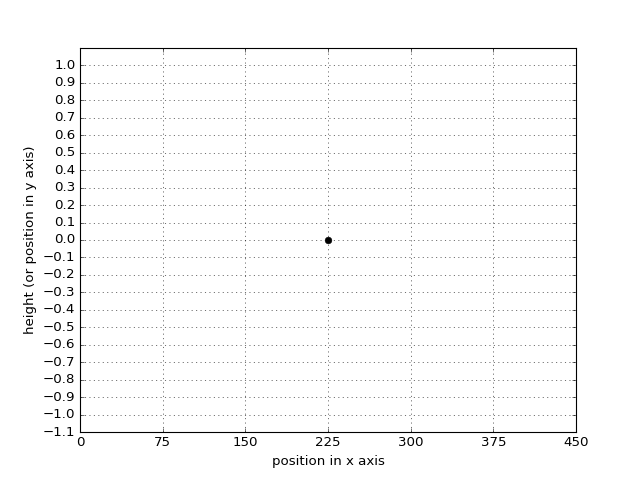

In [98]:
zeta =0.0003 #reset zeta 
abs_values = np.abs(mapp(ost_range,UnderDamped)) #get the abs values of UnderDamped for the animation
fig = plt.figure()
ax =  plt.axes(xlim=(0, one_sec_linear_distance), ylim=(-1.1, +1.1))

ax.set_xlabel('position in x axis')
ax.set_ylabel('height (or position in y axis)')

ax.set_yticks(np.arange(-1.1,1.1,0.1))
ax.set_xticks([0,75, 150, 225, 300, 375, 450])

plt.grid()

dots, =  ax.plot([], [], 'ko')

def init():
    dots.set_data([], [])
    
    return dots

# animation function.  This is called sequentially

def animate(i):
    dots.set_data([225],abs_values[i])
    return dots


In [99]:
# call the animator.  blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, ost_range, init_func=init, blit=True, repeat=False)

plt.show()

